In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers

#dense = tf.keras.layers.Dense(3, kernel_regularizer='l2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ovitrap = pd.read_csv('/content/drive/My Drive/Group 4/df_ovitrap_fullyimp_better.csv', index_col=False)

In [ ]:
df_ovitrap = df_ovitrap.drop(['trap_id','type','successful','total_aegypti_caught'], axis=1)

In [ ]:
df_ovitrap = df_ovitrap.iloc[: , 1:]

In [ ]:
df_ovitrap

,screening_total_aeg,screening_wmel_aeg,latitude,longitude,Comuna 1,Comuna 18,Comuna 20,November,December,January,February,March,April,July
0,2.000000,2.000000,3.458807,-76.557513,1,0,0,1,0,0,0,0,0,0
1,7.000000,5.000000,3.454069,-76.562949,1,0,0,1,0,0,0,0,0,0
2,17.000000,6.000000,3.457746,-76.583165,1,0,0,1,0,0,0,0,0,0
3,2.000000,1.000000,3.455246,-76.578502,1,0,0,0,1,0,0,0,0,0
4,15.000000,4.000000,3.457746,-76.583165,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,4.756177,1.442028,3.390597,-76.553677,0,1,0,0,0,0,0,0,0,1
830,7.160899,1.699536,3.389345,-76.556232,0,1,0,0,0,0,0,0,0,1
831,2.109384,0.987592,3.391474,-76.558260,0,1,0,0,0,0,0,0,0,1
832,2.109384,0.987592,3.385349,-76.547214,0,1,0,0,0,0,0,0,0,1


In [ ]:
#convert collected_at to month only
# df_ovitrap['collected_at'] = pd.to_datetime(df_ovitrap.collected_at)
# df_ovitrap['col_month'] = df_ovitrap['collected_at'].dt.strftime('%B')

In [ ]:
# df_ovitrap

In [ ]:
# #put comunas into cats

# categories = df_ovitrap['reporting_area'].unique()
# # create a vector with the category names,
# lencat = len(categories) # store the length of the categories vector to use later
# # one hot encoding, create three new columns which are true for that particular species, and false if not
# for a in categories: # loop over all the labels in categories
#     # + concatenates two strings
#       df_ovitrap[a] = pd.Series(df_ovitrap['reporting_area']==a).astype(int)

In [ ]:
# #and months

# categories = df_ovitrap['col_month'].unique()
# # create a vector with the category names,
# lencat = len(categories) # store the length of the categories vector to use later
# # one hot encoding, create three new columns which are true for that particular species, and false if not
# for a in categories: # loop over all the labels in categories
#     # + concatenates two strings
#       df_ovitrap[a] = pd.Series(df_ovitrap['col_month']==a).astype(int)

In [ ]:
# df_ovitrap

In [ ]:
# df_ovitrap = df_ovitrap.drop(['reporting_area','col_month', 'collected_at'],axis=1)

In [ ]:
# df_ovitrap

In [ ]:
df_ovitrap['infect_rate']=df_ovitrap['screening_wmel_aeg']/df_ovitrap['screening_total_aeg']

In [ ]:
df_ovitrap

,screening_total_aeg,screening_wmel_aeg,latitude,longitude,Comuna 1,Comuna 18,Comuna 20,November,December,January,February,March,April,July,infect_rate
0,2.000000,2.000000,3.458807,-76.557513,1,0,0,1,0,0,0,0,0,0,1.000000
1,7.000000,5.000000,3.454069,-76.562949,1,0,0,1,0,0,0,0,0,0,0.714286
2,17.000000,6.000000,3.457746,-76.583165,1,0,0,1,0,0,0,0,0,0,0.352941
3,2.000000,1.000000,3.455246,-76.578502,1,0,0,0,1,0,0,0,0,0,0.500000
4,15.000000,4.000000,3.457746,-76.583165,1,0,0,0,1,0,0,0,0,0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,4.756177,1.442028,3.390597,-76.553677,0,1,0,0,0,0,0,0,0,1,0.303191
830,7.160899,1.699536,3.389345,-76.556232,0,1,0,0,0,0,0,0,0,1,0.237335
831,2.109384,0.987592,3.391474,-76.558260,0,1,0,0,0,0,0,0,0,1,0.468190
832,2.109384,0.987592,3.385349,-76.547214,0,1,0,0,0,0,0,0,0,1,0.468190


In [ ]:
df_ovitrap=df_ovitrap.drop(['screening_total_aeg','screening_wmel_aeg'],axis=1)

In [ ]:
df_ovitrap

,latitude,longitude,Comuna 1,Comuna 18,Comuna 20,November,December,January,February,March,April,July,infect_rate
0,3.458807,-76.557513,1,0,0,1,0,0,0,0,0,0,1.000000
1,3.454069,-76.562949,1,0,0,1,0,0,0,0,0,0,0.714286
2,3.457746,-76.583165,1,0,0,1,0,0,0,0,0,0,0.352941
3,3.455246,-76.578502,1,0,0,0,1,0,0,0,0,0,0.500000
4,3.457746,-76.583165,1,0,0,0,1,0,0,0,0,0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,3.390597,-76.553677,0,1,0,0,0,0,0,0,0,1,0.303191
830,3.389345,-76.556232,0,1,0,0,0,0,0,0,0,1,0.237335
831,3.391474,-76.558260,0,1,0,0,0,0,0,0,0,1,0.468190
832,3.385349,-76.547214,0,1,0,0,0,0,0,0,0,1,0.468190


In [ ]:
from sklearn.model_selection import train_test_split

features = df_ovitrap.drop(['infect_rate'], axis=1)
labels = df_ovitrap['infect_rate']

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [ ]:
def build_model_regress(norm, n_hidden=1, n_neurons=30,
                            learning_rate=0.01):
  """Build and compile a simple sequential model with n_hidden
  layers and n_neurons in each layer."""

  model = keras.models.Sequential()
  model.add(norm)
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu",kernel_regularizer='l2'))
  model.add(keras.layers.Dense(1))

  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss=["mean_absolute_error"])

  return model

In [ ]:
nn_model = build_model_regress(normalizer, n_hidden=10, n_neurons=144,
                          learning_rate=0.01)
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
dense (Dense)                (None, 144)               1872      
_________________________________________________________________
dense_1 (Dense)              (None, 144)               20880     
_________________________________________________________________
dense_2 (Dense)              (None, 144)               20880     
_________________________________________________________________
dense_3 (Dense)              (None, 144)               20880     
_________________________________________________________________
dense_4 (Dense)              (None, 144)               20880     
_________________________________________________________________
dense_5 (Dense)              (None, 144)               2

In [ ]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

early_stopping_cb = EarlyStopping(patience=10,
                                  restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=500,
    callbacks=[reducelr_cb])

CPU times: user 45.6 s, sys: 1.82 s, total: 47.4 s
Wall time: 35.4 s


In [ ]:
nn_model.evaluate(X_test, y_test, verbose=0)

0.9059534072875977

Feature: 0, Score: 0.02628
Feature: 1, Score: 0.04524
Feature: 2, Score: 0.03619
Feature: 3, Score: -0.00552
Feature: 4, Score: 0.03967
Feature: 5, Score: -0.00336
Feature: 6, Score: 0.05535
Feature: 7, Score: 0.03096
Feature: 8, Score: 0.01212
Feature: 9, Score: 0.03536
Feature: 10, Score: -0.00627
Feature: 11, Score: 0.00312


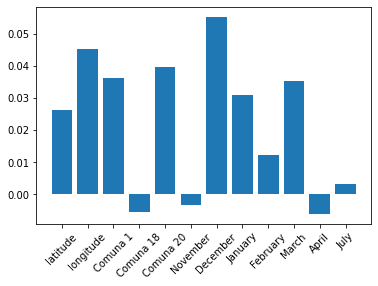

In [ ]:
# !pip install eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(history).fit(X_test, y_test)
# eli5.show_weights(perm)


# import numpy as np
# from eli5.permutation_importance import get_score_importances

# # ... load data, define score function
# def score(X, y):
#     return nn_model.evaluate(X, y, verbose=0)

# base_score, score_decreases = get_score_importances(score, X_test, y_test)
# feature_importances = np.mean(score_decreases, axis=0)


from sklearn.inspection import permutation_importance
from matplotlib import pyplot
results = permutation_importance(nn_model, X_test, y_test, scoring='r2')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  # col = df_ovitrap.columns[i]
  # pr = 'Feature: '+ col +', Score: %.5f'
	print('Feature: %0d, Score: %.5f' % (i,v))


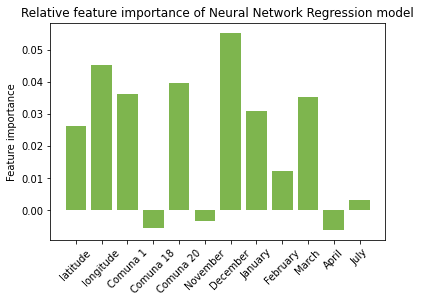

In [ ]:
# plot feature importance
fig, ax = pyplot.subplots()
pyplot.bar([lab for lab in df_ovitrap.columns[0:12]], importance, color='#7eb54e')
ax.set_xticklabels([lab for lab in df_ovitrap.columns[0:12]])
pyplot.xticks(rotation=45)
ax.set_ylabel('Feature importance')
ax.set_title('Relative feature importance of Neural Network Regression model')
pyplot.show()

In [ ]:
# df_ovitrap.columns[0:13]
importance

array([ 0.02624175,  0.02181067, -0.00639582, -0.00584182,  0.02488376,
       -0.00381559,  0.04921368,  0.03875016,  0.02024269,  0.03500908,
       -0.01455404,  0.0262841 ])